This notebook illustrates of to plot sea water properties (temperature in this case) at some discrete location on a map (i.e. scatter plot).

In [5]:
%matplotlib inline
import cf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl

In [6]:
mpl.rcParams.update({'font.size': 20, 'font.family': 'Times New Roman'})

# Loading the data

We use the temperature data from a drifter launched south of the Canary Island in April 2014.

In [7]:
datafile = "http://thredds.socib.es/thredds/dodsC/drifter/surface_drifter/drifter_svp033-ieo_svp005/L1/2014/dep0001_drifter-svp033_ieo-svp005_L1_2014-04-20.nc"

We read the time, the position and the temperature variables.

In [71]:
f = cf.read(datafile)
temperature = f.select('sea_water_temperature')

In [72]:
print temperature.coords()

{'aux1': <CF AuxiliaryCoordinate: longitude(20725) degrees_east>, 'dim0': <CF DimensionCoordinate: time(20725) gregorian>, 'dim1': <CF DimensionCoordinate: depth(1) m>, 'aux0': <CF AuxiliaryCoordinate: latitude(20725) degrees_north>}


In [73]:
lon = temperature.coord('longitude').array
lat = temperature.coord('latitude').array
time = temperature.coord('time').array

# Create a plot

As we have seen how to plot data on a map, we will use it here.<br/>
We start by creating a projection. The valid domain will be around the 

In [74]:
lonmin, lonmax, latmin, latmax = lon.min(), lon.max(), lat.min(), lat.max()
print lonmin, lonmax, latmin, latmax

-76.048 -14.248 16.549 31.065


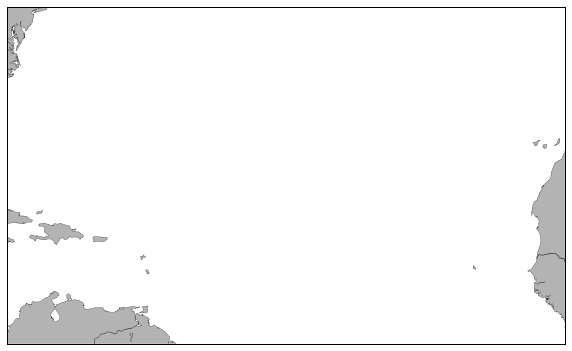

In [75]:
m = Basemap(projection='merc', llcrnrlat=latmin-10., urcrnrlat=latmax+10.,\
            llcrnrlon=lonmin-1., urcrnrlon=lonmax+1., lat_ts=0.5*(latmin+latmax), resolution='l')
plt.figure(figsize=(10,10))
m.drawcoastlines(linewidth=.25)
m.fillcontinents(color='.7')
plt.show()

Now we have the projectio, we can convert the drifter coordinates.

In [82]:
lon, lat = m(lon, lat)

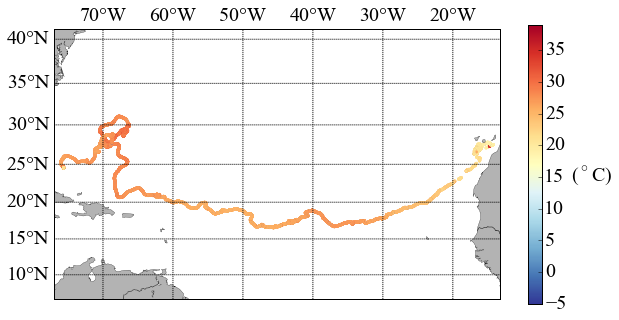

In [83]:
cmap = plt.cm.RdYlBu_r
plt.figure(figsize=(10,10))
m.drawcoastlines(linewidth=.25)
m.drawparallels(np.arange(5.,45.,5.), labels=[True,False,True,False])
m.drawmeridians(np.arange(-80.,-10.,10.), labels=[False,True,True,False])
m.fillcontinents(color='.7')
plt.scatter(lon, lat, c=temperature, s=10, edgecolor='None', cmap=cmap)
cbar = plt.colorbar(shrink=0.5)
cbar.set_label('($^{\circ}$C)', rotation=0, horizontalalignment='left')
plt.show()

From the colormap it seems we have low values for temperature. <br/>
Let's have a look at an [histogram](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist).

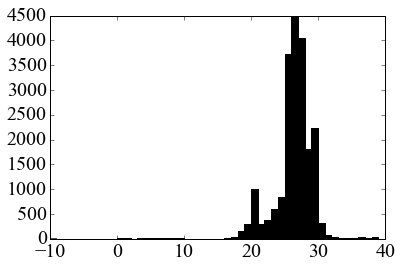

-5.0 C
38.989 C


In [84]:
plt.hist(temperature, np.arange(-10, 40, 1))
plt.show()
print temperature.min()
print temperature.max()

We see that most values are between 15ºC and 32ºC.<br/>
Let's examine the Qualitity Flags (QF) and their meaning.

In [85]:
temperatureQC = temperature.ancillary_variables[0].array
print temperature.ancillary_variables[0].flag_values
print temperature.ancillary_variables[0].flag_meanings

[0 1 2 3 4 6 9]
['no_qc_performed' 'good_data' 'probably_good_data' 'probably_bad_data'
 'bad_data' 'spike' 'missing_value']


We cound the occurrence of each QF value (function [bincount](http://docs.scipy.org/doc/numpy/reference/generated/numpy.bincount.html)): 

In [86]:
np.bincount(temperatureQC)

array([    0, 20190,     0,     0,     0,     0,   535])

Most of the measurements have a QF = 1 (good data), but we also have values flagged as *missing*, that we can mask for the final plot.

In [87]:
temperature = np.ma.masked_where(temperatureQC!=1, temperature)

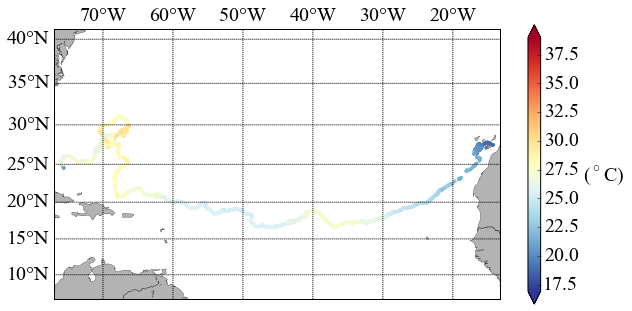

In [92]:
plt.figure(figsize=(10,10))
m.drawcoastlines(linewidth=.25)
m.drawparallels(np.arange(5.,45.,5.), labels=[True,False,True,False])
m.drawmeridians(np.arange(-80.,-10.,10.), labels=[False,True,True,False])
m.fillcontinents(color='.7')
plt.scatter(lon, lat, c=temperature, s=10, edgecolor='None', cmap=cmap)
cbar = plt.colorbar(shrink=0.5, extend='both')
cbar.set_label('($^{\circ}$C)', rotation=0, horizontalalignment='left')
plt.show()

There are still some very high values, not detected by the quality control.<br/>
We decide to mask the temperature above 32ºC.

In [99]:
temperature = np.ma.masked_greater(temperature, 32.)
print temperature.max()

31.937


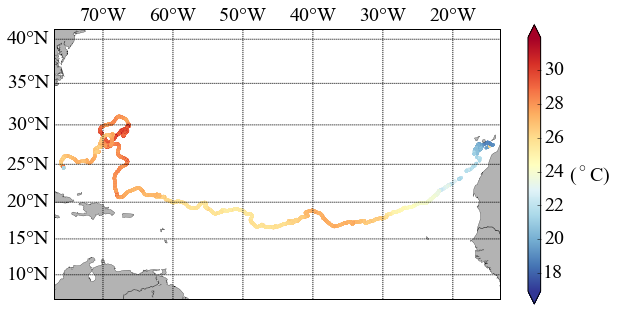

In [100]:
plt.figure(figsize=(10,10))
m.drawcoastlines(linewidth=.25)
m.drawparallels(np.arange(5.,45.,5.), labels=[True,False,True,False])
m.drawmeridians(np.arange(-80.,-10.,10.), labels=[False,True,True,False])
m.fillcontinents(color='.7')
plt.scatter(lon, lat, c=temperature, s=10, edgecolor='None', cmap=cmap)
cbar = plt.colorbar(shrink=0.5, extend='both')
cbar.set_label('($^{\circ}$C)', rotation=0, horizontalalignment='left')
plt.show()